## Sequence Models
It's important to really take words, and compute embeddings for them, but the relative ordering, the sequence of words matters too for the meaning of a sentence, and if you jumble the words around, that changes, or destroys the meaning of a sentence. 

If you take just a very simple sentence, like my dog sat on my hat, and you swap the words dog, and hat, you're now changing from a sentence that has some kind of meaning, and some semantics, to a ridiculous sentence that has no meaning. So when we were doing classification based on embeddings, it was very nice that we had words with similar meanings, labels in a particular way, so that we could say okay, this is a positive review, and I got a bunch of vectors that are similar, this is a negative review, and I got these vectors in a similar way, but ordering those then gives us that whole extra layer of meaning that'll help us to understand the sentence rather than just a simple classification.

So for a neural network, to take into account the ordering of the words, people now use specialized Neural Network Architectures, things like an RNN, or GIO, or LSTM, and you see what all these terms mean, and a little bit, in order for these Specialized Neural Networks to process natural language. Yeah. So like something like an RNN, it's really interesting that, the context is preserved from timestamp to timestamp, which can be really useful, but that might get lost in longer sentences, and that's why I really love LSTMs because LSTMs have that cell state, and the cell state are almost like a conveyor belts carrying contexts all the way down, for a long way down timestamp. 

It's like you could say, okay the context from speak, means that it's a language, but you have to go all the way back to the beginning of the sentence to see that it's Ireland, and then in Ireland, I would learn how to speak. You speak Gaelic. Really badly. Since we learn to infant all of these things. Let's go on to the next video.

Take a look to the next sentence. I lived in Ireland so at school they made me learn how to speak something. How would you finish that sentence? Well, you might say Irish but you'd be much more accurate if you said, I lived in Ireland so at school they made me learn how to speak Gaelic. First of course, is the syntactic issue. Irish describes the people, Gaelic describes the language. But more importantly in the ML context is the key word that gives us the details about the language. That's the word Ireland, which appears much earlier in the sentence. So, if we're looking at a sequence of words we might lose that context. With that in mind an update to RNNs is called LSTM, long short - term memory has been created. In addition to the context being PaaSed as it is in RNNs, LSTMs have an additional pipeline of contexts called cell state. This can pass through the network to impact it.<br> 
We can stack LSTM layers like any other layers, but when we do this we have to specify the `return_sequences=True` in the first one. This ensures the output from the LSTM matches the input of the next one.

```python
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)), # number of outputs 64
    tf.keras.layers.Dense(64, acitvation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

```

### Subwords 8K with Single Layers

In [9]:
from __future__ import absolute_import, division, print_function, unicode_literals


import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.3.0


In [10]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [11]:
tokenizer = info.features['text'].encoder

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(train_dataset))
test_dataset = test_dataset.padded_batch(BATCH_SIZE, tf.compat.v1.data.get_output_shapes(test_dataset))

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          523840    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [14]:
NUM_EPOCHS = 2  # just 2 cause takes to long 
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/2
391/391 [==============================] - 1185s 3s/step - loss: 0.5092 - accuracy: 0.7565 - val_loss: 0.6695 - val_accuracy: 0.7134
Epoch 2/2
391/391 [==============================] - 1244s 3s/step - loss: 0.3920 - accuracy: 0.8371 - val_loss: 0.4670 - val_accuracy: 0.8070


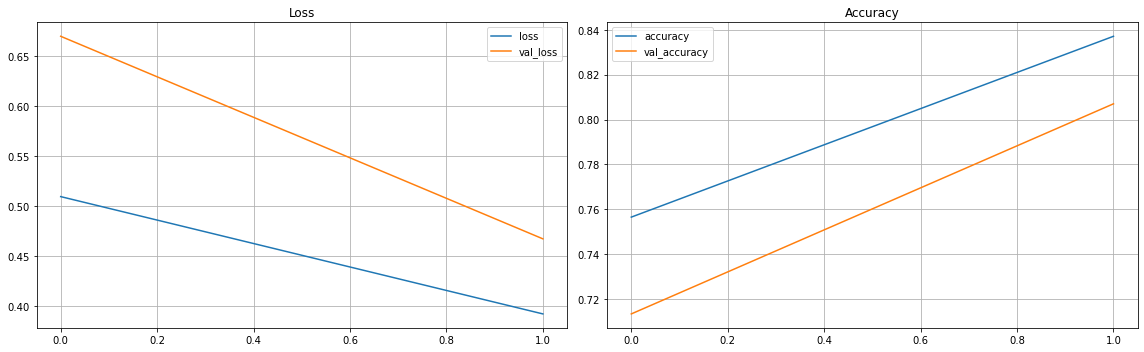

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

history_df = pd.DataFrame(history.history, columns=['loss','accuracy','val_loss','val_accuracy'])
fig, (ax1,ax2) = plt.subplots(1, 2, figsize=(16, 5))
history_df[['loss','val_loss']].plot(ax=ax1, grid=True, title='Loss')
history_df[['accuracy','val_accuracy']].plot(ax=ax2, grid=True, title='Accuracy')
plt.tight_layout()


**Note**: Increase epochs, add another LSTM layer.

Here's the comparison of accuracies between the one layer LSTM and the two layer one over 10 epochs. There's not much of a difference except the nosedive and the validation accuracy. But notice how the training curve is smoother. I found from training networks that jaggedness can be an indication that your model needs improvement, and the single LSTM that you can see here is not the smoothest. If you look at loss, over the first 10 epochs, we can see similar results. But look what happens when we increase to 50 epochs training. Our one layer LSTM, while climbing in accuracy, is also prone to some pretty sharp dips. The final result might be good, but those dips makes me suspicious about the overall accuracy of the model. Our two layer one looks much smoother, and as such makes me much more confident in its results. Note also the validation accuracy. Considering it levels out at about 80 percent, it's not bad given that the training set and the test set were both 25,000 reviews. But we're using 8,000 sub-words taken only from the training set. So there would be many tokens in the test sets that would be out of vocabulary. Yet despite that, we are still at about 80 percent accuracy